 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Apr/2022 17:42:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2022 17:42:32] "POST /upload HTTP/1.1" 302 -
127.0.0.1 - - [20/Apr/2022 17:42:32] "GET /predict%3FimageName%3Dnum1.png HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2022 17:42:32] "GET /upload/num1.png HTTP/1.1" 404 -
127.0.0.1 - - [20/Apr/2022 17:42:32] "GET /upload/num2.png HTTP/1.1" 404 -
127.0.0.1 - - [20/Apr/2022 17:43:10] "GET /predict%3FimageName%3Dnum1.png HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2022 17:43:10] "GET /upload/num1.png HTTP/1.1" 404 -
127.0.0.1 - - [20/Apr/2022 17:43:10] "GET /upload/num2.png HTTP/1.1" 404 -
127.0.0.1 - - [20/Apr/2022 17:43:11] "GET /predict%3FimageName%3Dnum1.png HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2022 17:43:11] "GET /upload/num1.png HTTP/1.1" 404 -
127.0.0.1 - - [20/Apr/2022 17:43:11] "GET /upload/num2.png HTTP/1.1" 404 -


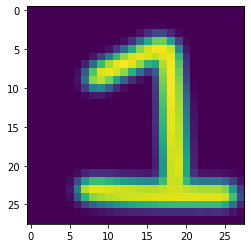

In [17]:
from flask import Flask, render_template, request, url_for, redirect
from werkzeug.utils import secure_filename
import os

from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt


app=Flask(__name__)

app.config["IMAGE_UPLOADS"]="upload"

@app.route("/")
def home():
  myName="Wong Yu Tin"
  return render_template("home.html",name=myName)

@app.route('/upload',methods=['POST','GET'])
def upload():
  if request.method=='POST':
    f=request.files['file']
    filename=secure_filename(f.filename)
    predict_filepath=os.path.join(app.config["IMAGE_UPLOADS"],filename)
    f.save(predict_filepath)
    return redirect(url_for('predict',predict_file_name=filename))

@app.route('/predict?imageName=<predict_file_name>')
def predict(predict_file_name):
  filename = "upload/"+predict_file_name
  # load the image
  img = load_img(filename, grayscale=True, target_size=(28, 28))
  plt.imshow(img)
  # convert to array
  img = img_to_array(img)
  # reshape into a single sample with 1 channel
  img = img.reshape(1, 28, 28, 1)
  # prepare pixel data
  img = img.astype('float32')
  img = img / 255.0
  # load model
  model = load_model('numberClassification.h5')
  # predict the class
  predict_value = model.predict(img)
  digit = argmax(predict_value)

  return render_template("predict.html",prediction=digit, imgsrc = filename)
app.run()
